In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [38]:
num_points = 15
side_length = 10**3
N = 6  # Виленский

x_coords = np.random.uniform(0, side_length, num_points)
y_coords = np.random.uniform(0, side_length, num_points)

points = list(zip(x_coords, y_coords))

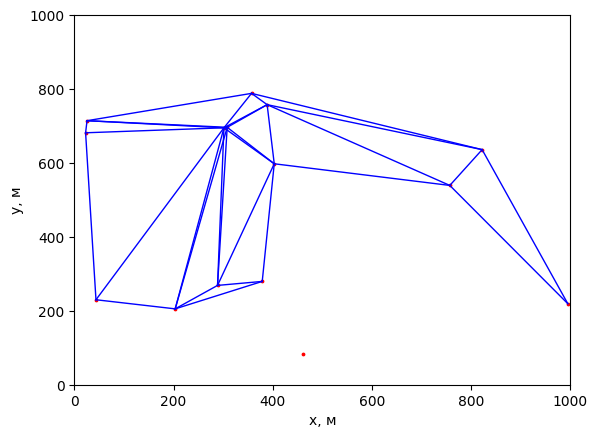

In [46]:
def is_point_upper_line(line, point):
    return (
        point[1] >=
        (point[0] - line[0][0])
        / (line[1][0] - line[0][0])
        * (line[1][1] - line[0][1])
        + line[0][1]
    )

edges = {tuple(sorted((points[0], min(
    points[1:],
    key=lambda point:
        (point[0] - points[0][0]) ** 2 + 
        (point[1] - points[0][1]) ** 2
))))}

edges_with_free_top = {list(edges)[0]}
edges_with_free_buttom = edges_with_free_top.copy()

while edges_with_free_top or edges_with_free_buttom:
    clear_output(wait=True)

    if edges_with_free_top:
        needs_to_find_upper = True
        live_edge = list(edges_with_free_top)[0]
    else:
        needs_to_find_upper = False
        live_edge = list(edges_with_free_buttom)[0]

    avable_points = []
    for point in points:
        if point in live_edge:
            continue

        if is_point_upper_line(live_edge, point) != needs_to_find_upper:
            continue
        
        edge = tuple(sorted((point, live_edge[0])))
        is_second_point_upper = is_point_upper_line(edge, live_edge[1])
        if (edge in edges and (
            is_second_point_upper and edge not in edges_with_free_top or
            not is_second_point_upper and edge not in edges_with_free_buttom
        )):
            continue
        
        edge = tuple(sorted((point, live_edge[1])))
        is_second_point_upper = is_point_upper_line(edge, live_edge[0])
        if (edge in edges and (
            is_second_point_upper and edge not in edges_with_free_top or
            not is_second_point_upper and edge not in edges_with_free_buttom
        )):
            continue

        avable_points.append(point)
    
    edge_center = (
        (live_edge[0][0] + live_edge[1][0]) / 2,
        (live_edge[0][1] + live_edge[1][1]) / 2
    )

    if avable_points:
        new_point = min(
            avable_points,
            key=lambda point:
                (point[0] - edge_center[0]) ** 2 +
                (point[1] - edge_center[1]) ** 2
        )

        new_edge = tuple(sorted((new_point, live_edge[0])))
        if is_point_upper_line(new_edge, live_edge[1]):
            if new_edge in edges_with_free_buttom:
                edges_with_free_buttom.remove(new_edge)
            else:
                edges_with_free_buttom.add(new_edge)
        else:
            if new_edge in edges_with_free_top:
                edges_with_free_top.remove(new_edge)
            else:
                edges_with_free_top.add(new_edge)
        edges.add(new_edge)

        new_edge = tuple(sorted((new_point, live_edge[1])))
        if is_point_upper_line(new_edge, live_edge[0]):
            if new_edge in edges_with_free_buttom:
                edges_with_free_buttom.remove(new_edge)
            else:
                edges_with_free_buttom.add(new_edge)
        else:
            if new_edge in edges_with_free_top:
                edges_with_free_top.remove(new_edge)
            else:
                edges_with_free_top.add(new_edge)
        edges.add(new_edge)

    if needs_to_find_upper:
        edges_with_free_top.remove(live_edge)
    else:
        edges_with_free_buttom.remove(live_edge)

    for (x1, y1), (x2, y2) in edges:
        plt.plot((x1, x2), (y1, y2), linewidth=1, color='blue')

    plt.scatter(x_coords, y_coords, s=3, color='red')

    plt.xlim(0, side_length)
    plt.ylim(0, side_length)
    plt.xlabel('x, м')
    plt.ylabel('y, м')

    plt.show()
    time.sleep(.1)

    if len(edges) > 30:
        break